In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv("credit_loan_data_clean.csv")

In [6]:
df.shape

(7392, 20)

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7392 entries, 0 to 7391
Data columns (total 20 columns):
Unnamed: 0                      7392 non-null int64
Loan Status                     7392 non-null int64
Current Loan Amount             7392 non-null int64
Credit Score                    7392 non-null int64
Annual Income                   7392 non-null int64
Years in current job            7392 non-null int64
Monthly Debt                    7392 non-null float64
Years of Credit History         7392 non-null float64
Number of Open Accounts         7392 non-null int64
Number of Credit Problems       7392 non-null int64
Current Credit Balance          7392 non-null int64
Maximum Open Credit             7392 non-null int64
Bankruptcies                    7392 non-null int64
Tax Liens                       7392 non-null int64
Term_Long Term                  7392 non-null int64
Term_Short Term                 7392 non-null int64
Home Ownership_HaveMortgage     7392 non-null int64
Home 

##### Splitting data into Training & Test

In [8]:
y = df['Loan Status']
X = df.drop(['Loan Status'],axis=1)

###### Min Max Scaler

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [10]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

/opt/ohpc/pub/apps/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
log_clf = LogisticRegression(penalty = 'l1', C = 10, solver = 'liblinear', max_iter = 5000, random_state=42)
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

print("Accuracy on training set using Logistic Regression model: {:.4f}".format(log_clf.score(X_train, y_train)))
print("Accuracy on test set using Logistic Regression model: {:.4f}".format(log_clf.score(X_test, y_test)))

Accuracy on training set using Logistic Regression model: 0.7599
Accuracy on test set using Logistic Regression model: 0.7688


In [13]:
dtree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree_clf.fit(X_train, y_train)

print("Accuracy on training set using Decision Tree Model: {:.4f}".format(dtree_clf.score(X_train, y_train)))
print("Accuracy on test set using Decision Tree Model: {:.4f}".format(dtree_clf.score(X_test, y_test)))

Accuracy on training set using Decision Tree Model: 0.7610
Accuracy on test set using Decision Tree Model: 0.7661


In [14]:
svc_clf = SVC(C = 100, gamma = 0.1, probability = True, random_state= 42)
svc_clf.fit(X_train, y_train)
print('Accuracy on training set using SVC Model: {:.4f}'.format(svc_clf.score(X_train, y_train)))
print('Accuracy on test set using  SVC Model: {:.4f}'.format(svc_clf.score(X_test, y_test)))

Accuracy on training set using SVC Model: 0.7605
Accuracy on test set using  SVC Model: 0.7667


In [15]:
voting_hard_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dtree_clf), ('svc', svc_clf)], voting='hard')
voting_hard_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, dtree_clf, svc_clf, voting_hard_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '%.4f'%accuracy_score(y_test, y_pred))

LogisticRegression 0.7688
DecisionTreeClassifier 0.7661
SVC 0.7667
VotingClassifier 0.7667


/opt/ohpc/pub/apps/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
voting_soft_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dtree_clf), ('svc', svc_clf)], voting='soft')
voting_soft_clf.fit(X_train, y_train)

for clf in (log_clf, dtree_clf, svc_clf, voting_soft_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '%.4f'%accuracy_score(y_test, y_pred))

LogisticRegression 0.7688
DecisionTreeClassifier 0.7661
SVC 0.7667
VotingClassifier 0.7667


/opt/ohpc/pub/apps/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


##### Soft Voting and Hard Voting results are the same for this dataset

# Applying Decision Tree model with Bagging Classifier

In [17]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(dtree_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=42, oob_score = True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [18]:
print('Train score of Decision Tree model with Bagging Classifier: %.4f'%bag_clf.score(X_train, y_train))
print('Test score of Decision Tree model with Bagging Classifier: %.4f'%bag_clf.score(X_test, y_test))
print('Out-of-bag score: %.4f'%bag_clf.oob_score_)

Train score of Decision Tree model with Bagging Classifier: 0.7597
Test score of Decision Tree model with Bagging Classifier: 0.7667
Out-of-bag score: 0.7597


# Applying Logistic Regression model with Bagging Classifier

In [19]:
from sklearn.ensemble import BaggingClassifier

bag_log = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=42, oob_score = True)

bag_log.fit(X_train, y_train)
y_pred = bag_log.predict(X_test)

In [20]:
print('Train score of Logistic Regression model with Bagging Classifier: %.4f'%bag_log.score(X_train, y_train))
print('Test score Logistic Regression model with Bagging Classifier: %.4f'%bag_log.score(X_test, y_test))
print('Out-of-bag score: %.2f'%bag_log.oob_score_)

Train score of Logistic Regression model with Bagging Classifier: 0.7595
Test score Logistic Regression model with Bagging Classifier: 0.7688
Out-of-bag score: 0.76


# Applying Decision Tree model with Pasting Classifier

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

pas_clf = BaggingClassifier(dtree_clf, n_estimators=100, max_samples=500, bootstrap=False, random_state=0)

pas_clf.fit(X_train, y_train)
y_pred = pas_clf.predict(X_test)

In [22]:
print('Train score of Decision Tree model with Pasting Classifier: %.4f'%pas_clf.score(X_train, y_train))
print('Test score of Decision Tree model with Pasting Classifier: %.4f'%pas_clf.score(X_test, y_test))

Train score of Decision Tree model with Pasting Classifier: 0.7607
Test score of Decision Tree model with Pasting Classifier: 0.7661


# Applying Logistic Regression model with Pasting Classifier

In [23]:
from sklearn.ensemble import BaggingClassifier

pas_log = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=42)

pas_log.fit(X_train, y_train)
y_pred = pas_log.predict(X_test)

In [24]:
print('Train score of Logistic Regression model with Pasting Classifie: %.4f'%pas_log.score(X_train, y_train))
print('Test score of Logistic Regression model with Pasting Classifie: %.4f'%pas_log.score(X_test, y_test))

Train score of Logistic Regression model with Pasting Classifie: 0.7599
Test score of Logistic Regression model with Pasting Classifie: 0.7674


# Applying SVC model with AdaBoosting Classifier

In [25]:
from sklearn.ensemble import AdaBoostClassifier

svc=SVC(probability=True, kernel='linear')

ab =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1, random_state=42)

ab_model = ab.fit(X_train, y_train)

y_pred = ab_model.predict(X_test)

In [26]:
print('Train score of SVC model with AdaBoosting Classifier: %.4f'%ab.score(X_train, y_train))
print('Test score of SVC model with AdaBoosting Classifier: %.4f'%ab.score(X_test, y_test))

Train score of SVC model with AdaBoosting Classifier: 0.7599
Test score of SVC model with AdaBoosting Classifier: 0.7667


# Applying Decision Tree model with AdaBoosting Classifier

In [27]:
ab_dt =AdaBoostClassifier(n_estimators=50, base_estimator=dtree_clf,learning_rate=1, random_state=42)

ab_dt_model = ab_dt.fit(X_train, y_train)

y_pred = ab_dt_model.predict(X_test)

In [28]:
print('Train score of Decision Tree model with AdaBoosting Classifier: %.4f'%ab_dt.score(X_train, y_train))
print('Test score of Decision Tree model with AdaBoosting Classifier: %.4f'%ab_dt.score(X_test, y_test))

Train score of Decision Tree model with AdaBoosting Classifier: 0.8840
Test score of Decision Tree model with AdaBoosting Classifier: 0.6876


# Gradient Boosting

In [29]:
from  sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.1, random_state=42)

gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.763
Accuracy on test set: 0.763


# Gradient Boosting Feature Importance

([<matplotlib.axis.YTick at 0x2ab4cbe99748>,
 <a list of 19 Text yticklabel objects>)

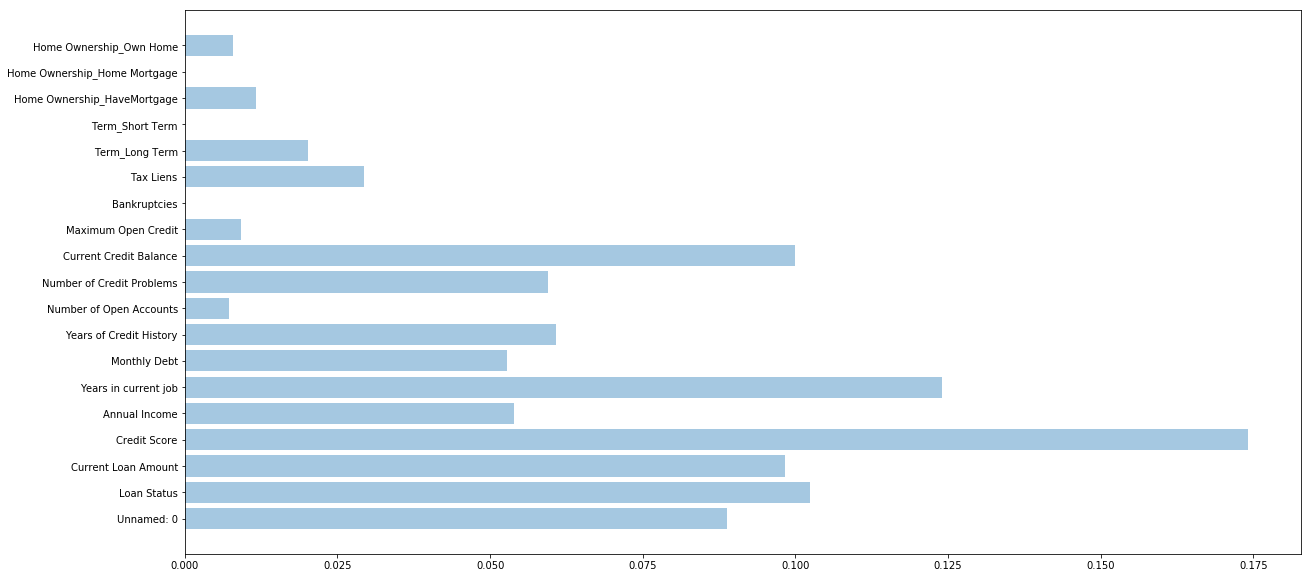

In [30]:
%matplotlib inline

plt.subplots(figsize = (20,10))
y_list = gbrt.feature_importances_
y_pos = np.arange(len(y_list))
features = df.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

#### As per this chart Credit Score is the most important feature in Gradient Boosting classifier

# Applying PCA on data

In [31]:
from sklearn.decomposition import PCA

# reduce the dimensionality
pca = PCA(n_components= 0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [32]:
print(X_train_pca.ndim)
print(X_train_pca.shape)

2
(5913, 7)


#### Number of features after applying PCA on data is 7

# Applying classification models on the data from PCA:

## K Nearest Neighbors Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,25):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_pca, y_train)
    train_score_array.append(knn.score(X_train_pca, y_train))
    test_score_array.append(knn.score(X_test_pca, y_test))

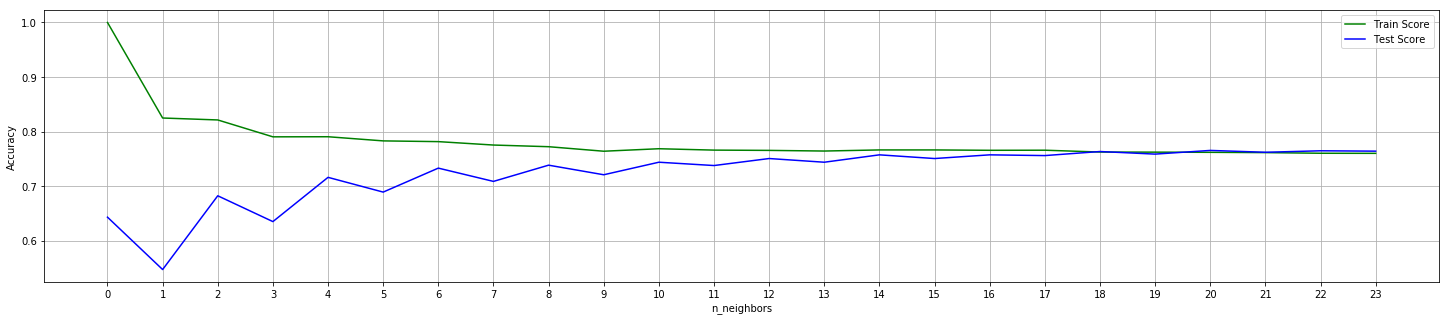

In [34]:
x_axis = range(1,25)
%matplotlib inline

plt.subplots(figsize = (25,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis, np.arange(25))
plt.grid()
plt.legend()

In [35]:
position_max = test_score_array.index(max(test_score_array))
print(position_max)
print(train_score_array[position_max])
print(test_score_array[position_max])

20
0.7618806020632505
0.7653820148749155


###### The best KNN classifer uses a k of 20. 

## Logistic Regression 

In [36]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 5000, random_state=42)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 5000, random_state=42)
    log_l1.fit(X_train_pca, y_train)
    log_l2.fit(X_train_pca, y_train)
    train_score_l1.append(log_l1.score(X_train_pca, y_train))
    train_score_l2.append(log_l2.score(X_train_pca, y_train))
    test_score_l1.append(log_l1.score(X_test_pca, y_test))
    test_score_l2.append(log_l2.score(X_test_pca, y_test))

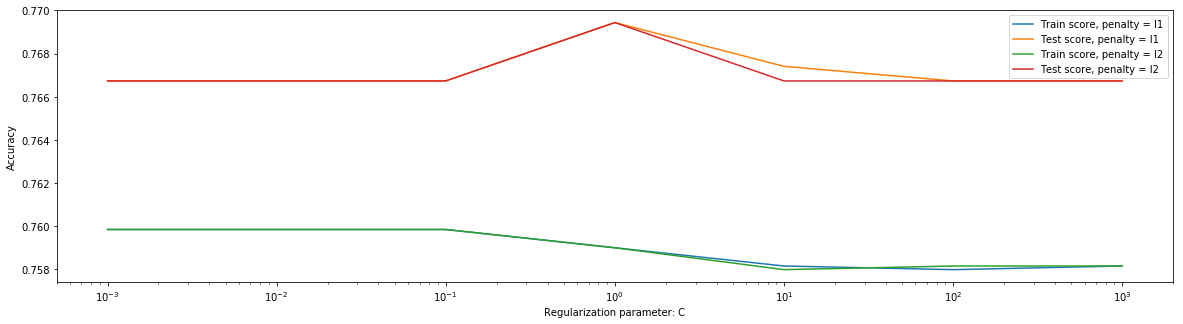

In [37]:
plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [38]:
position_max_l1 = test_score_l1.index(max(test_score_l1))
print(position_max_l1)
print(train_score_l1[position_max_l1])
print(test_score_l1[position_max_l1])

3
0.7590055809233891
0.7694388100067613


In [39]:
position_max_l2 = test_score_l2.index(max(test_score_l2))
print(position_max_l2)
print(train_score_l2[position_max_l2])
print(test_score_l2[position_max_l2])

3
0.7590055809233891
0.7694388100067613


###### Logistic regression using L1 and L2 regularization yielded the same results. 
###### For both L1 and L2 regularization, the best C hyperparameter was 1.

## Decision Tree Classifier

In [40]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    clf = DecisionTreeClassifier(random_state=42,max_depth=k)
    clf.fit(X_train_pca, y_train)

    train_score_array.append(clf.score(X_train_pca, y_train))
    test_score_array.append(clf.score(X_test_pca, y_test))

Text(0,0.5,'Score')

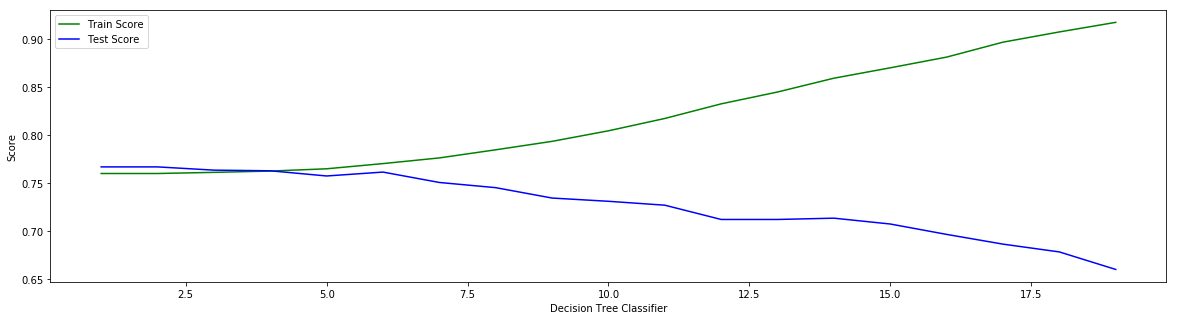

In [41]:
x_axis = range(1,20)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Decision Tree Classifier')
plt.ylabel('Score')

###### The best Decision Tree Classifier used a max depth of 2 

In [42]:
print(train_score_array[2])
print(test_score_array[2])

0.76103500761035
0.7633536173089925


## Linear Support Vector Machine

In [43]:
from sklearn.svm import LinearSVC

train_scores = []
test_scores = []
x_range = [ 0.1, 1, 10, 100, 1000]

for i in x_range:
    clf1 = LinearSVC(random_state = 42, C = i)
    clf1.fit(X_train_pca, y_train)
    train_scores.append(clf1.score(X_train_pca, y_train))
    test_scores.append(clf1.score(X_test_pca, y_test))
    
print('Train Score: ', train_scores)
print('Test Score: ', test_scores)

Train Score:  [0.7598511753762895, 0.7598511753762895, 0.7598511753762895, 0.7556232031117875, 0.6646372399797057]
Test Score:  [0.7667342799188641, 0.7667342799188641, 0.7667342799188641, 0.7586206896551724, 0.6457065584854631]


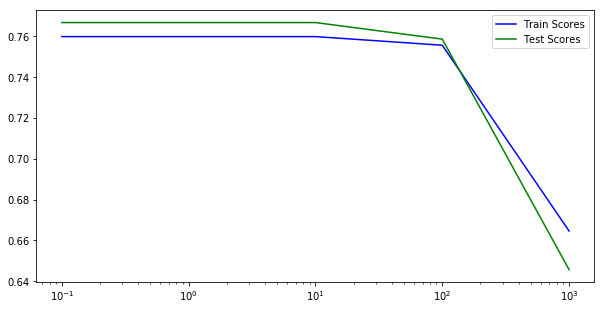

In [44]:
plt.figure(figsize=(10,5))
plt.plot(x_range, train_scores, color = 'blue', label = 'Train Scores')
plt.plot(x_range, test_scores, color = 'green', label = 'Test Scores')
plt.xscale('log')
plt.legend()

###### The best LinearSVC model uses a C hyperparameter of 10. 

In [45]:
clf1 = LinearSVC(random_state = 42, C = 10, max_iter = 10000)
clf1.fit(X_train_pca, y_train)
print('Train Score: {:.4f}'.format(clf1.score(X_train_pca, y_train)))
print('Test Score: {:.4f}'.format(clf1.score(X_test_pca, y_test)))

Train Score: 0.7599
Test Score: 0.7667


## Gridsearch Setup

In [46]:
param_grid = {'C': [1, 10, 100,1000,10000],
              'gamma': [0.01, 0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [1, 10, 100, 1000, 10000], 'gamma': [0.01, 0.1, 1, 10]}


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns

## SVC - rbf Model

In [48]:
grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv=3, return_train_score=True, n_jobs = -1)

In [49]:
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 10, 100, 1000, 10000], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [50]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 0.01}
Best cross-validation score: 0.76


In [51]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.477199,0.121316,0.168156,0.067349,1,0.01,"{'C': 1, 'gamma': 0.01}",0.759635,0.760020,0.759898,0.759851,0.000161,1,0.759959,0.759767,0.759828,0.759851,0.000080
1,0.578338,0.162985,0.174603,0.061556,1,0.1,"{'C': 1, 'gamma': 0.1}",0.759635,0.760020,0.759898,0.759851,0.000161,1,0.759959,0.759767,0.759828,0.759851,0.000080
2,0.927548,0.034758,0.148135,0.000756,1,1,"{'C': 1, 'gamma': 1}",0.759128,0.760020,0.759898,0.759682,0.000395,9,0.760213,0.759767,0.759828,0.759936,0.000198
3,0.918596,0.013764,0.153337,0.001087,1,10,"{'C': 1, 'gamma': 10}",0.752535,0.750888,0.750254,0.751226,0.000962,14,0.776453,0.775748,0.777581,0.776594,0.000755
4,0.543126,0.181820,0.171553,0.057170,10,0.01,"{'C': 10, 'gamma': 0.01}",0.759635,0.760020,0.759898,0.759851,0.000161,1,0.759959,0.759767,0.759828,0.759851,0.000080


([<matplotlib.axis.YTick at 0x2ab4fdf55f60>,
 <a list of 5 Text yticklabel objects>)

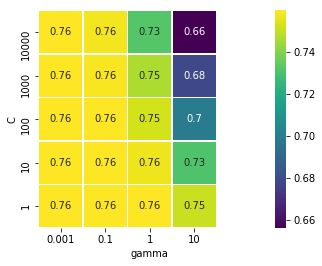

In [52]:
%matplotlib inline

plt.figure(figsize=(5,4))
scores = np.array(results.mean_test_score).reshape(5, 4)
sns.heatmap(scores, linewidths = 0.5 , cmap='viridis', annot=True)
plt.xlabel('gamma')
plt.ylabel('C')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xticks(np.arange(4)+0.5, [0.001, 0.1, 1, 10, 100])
plt.yticks(np.arange(5)+0.5, [1,10, 100,1000,10000])

## SVC - linear Model

In [53]:
grid_search_linear = GridSearchCV(SVC(kernel='linear'), param_grid, cv=3, return_train_score=True, n_jobs = -1)

In [54]:
grid_search_linear.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 10, 100, 1000, 10000], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [55]:
print("Best parameters: {}".format(grid_search_linear.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_linear.best_score_))

Best parameters: {'C': 1, 'gamma': 0.01}
Best cross-validation score: 0.76


In [56]:
# convert to DataFrame
results_linear = pd.DataFrame(grid_search_linear.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.477199,0.121316,0.168156,0.067349,1,0.01,"{'C': 1, 'gamma': 0.01}",0.759635,0.760020,0.759898,0.759851,0.000161,1,0.759959,0.759767,0.759828,0.759851,0.000080
1,0.578338,0.162985,0.174603,0.061556,1,0.1,"{'C': 1, 'gamma': 0.1}",0.759635,0.760020,0.759898,0.759851,0.000161,1,0.759959,0.759767,0.759828,0.759851,0.000080
2,0.927548,0.034758,0.148135,0.000756,1,1,"{'C': 1, 'gamma': 1}",0.759128,0.760020,0.759898,0.759682,0.000395,9,0.760213,0.759767,0.759828,0.759936,0.000198
3,0.918596,0.013764,0.153337,0.001087,1,10,"{'C': 1, 'gamma': 10}",0.752535,0.750888,0.750254,0.751226,0.000962,14,0.776453,0.775748,0.777581,0.776594,0.000755
4,0.543126,0.181820,0.171553,0.057170,10,0.01,"{'C': 10, 'gamma': 0.01}",0.759635,0.760020,0.759898,0.759851,0.000161,1,0.759959,0.759767,0.759828,0.759851,0.000080


([<matplotlib.axis.YTick at 0x2ab4fdfac240>,
 <a list of 5 Text yticklabel objects>)

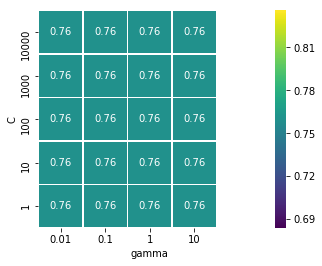

In [57]:
%matplotlib inline

plt.figure(figsize=(5,4))
scores = np.array(results_linear.mean_test_score).reshape(5, 4)
sns.heatmap(scores, linewidths = 0.5 , cmap='viridis', annot=True)
plt.xlabel('gamma')
plt.ylabel('C')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xticks(np.arange(4)+0.5, [0.01, 0.1, 1, 10, 100])
plt.yticks(np.arange(5)+0.5, [1, 10, 100,1000,10000])

## SVC - polynomial Model

In [58]:
grid_search_poly = GridSearchCV(SVC(kernel='poly', degree = 2), param_grid, cv=3, return_train_score=True, n_jobs = -1)

In [59]:
grid_search_poly.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 10, 100, 1000, 10000], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [60]:
print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))

Best parameters: {'C': 1, 'gamma': 0.01}
Best cross-validation score: 0.76


In [61]:
# convert to DataFrame
results_poly = pd.DataFrame(grid_search_poly.cv_results_)
# show the first 5 rows
display(results_poly.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.207199,0.019426,0.049055,0.000372,1,0.01,"{'C': 1, 'gamma': 0.01}",0.759635,0.76002,0.759898,0.759851,0.000161,1,0.759959,0.759767,0.759828,0.759851,0.00008
1,0.272670,0.036056,0.062870,0.017850,1,0.1,"{'C': 1, 'gamma': 0.1}",0.759635,0.76002,0.759898,0.759851,0.000161,1,0.759959,0.759767,0.759828,0.759851,0.00008
2,0.233527,0.015070,0.051442,0.000346,1,1,"{'C': 1, 'gamma': 1}",0.759635,0.76002,0.759898,0.759851,0.000161,1,0.759959,0.759767,0.759828,0.759851,0.00008
3,20.193752,1.287736,0.066717,0.000584,1,10,"{'C': 1, 'gamma': 10}",0.759635,0.76002,0.759898,0.759851,0.000161,1,0.759959,0.759767,0.759828,0.759851,0.00008
4,0.202306,0.009485,0.050520,0.000152,10,0.01,"{'C': 10, 'gamma': 0.01}",0.759635,0.76002,0.759898,0.759851,0.000161,1,0.759959,0.759767,0.759828,0.759851,0.00008


([<matplotlib.axis.YTick at 0x2ab4fdf5afd0>,
 <a list of 5 Text yticklabel objects>)

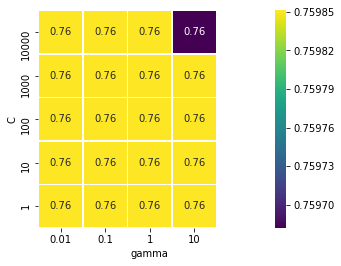

In [62]:
%matplotlib inline

plt.figure(figsize=(5,4))
scores = np.array(results_poly.mean_test_score).reshape(5, 4)
sns.heatmap(scores, linewidths = 0.5 , cmap='viridis', annot=True)
plt.xlabel('gamma')
plt.ylabel('C')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xticks(np.arange(4)+0.5, [0.01, 0.1, 1, 10, 100])
plt.yticks(np.arange(5)+0.5, [1, 10, 100,1000,10000])

In [63]:
scores.max()

0.7598511753762895

## Comparing classification results on the original data vs PCA data

In [64]:
data = {'Score Type':  ['Train Score', 'Test Score'],
                'KNN Orig': ['0.7605', '0.7667'],
                'KNN PCA': ['0.7619', '0.7654'],
                'Logistic Regression Orig': ['0.7599', '0.7688'],
                'Logistic Regression PCA': ['0.7590', '0.7694'],
                'Decision Tree Orig': ['0.7634', '0.7586'],
                'Decision Tree PCA': ['0.7610', '0.7634'],
                'Linear SVC Orig': ['0.7599', '0.7674'],
                'Linear SVC PCA': ['0.7599', '0.7667']
        }

df = pd.DataFrame (data, columns = ['Score Type','KNN Orig','KNN PCA','Logistic Regression Orig','Logistic Regression PCA',
                                         'Decision Tree Orig','Decision Tree PCA','Linear SVC Orig','Linear SVC PCA'])

df

,Score Type,KNN Orig,KNN PCA,Logistic Regression Orig,Logistic Regression PCA,Decision Tree Orig,Decision Tree PCA,Linear SVC Orig,Linear SVC PCA
0,Train Score,0.7605,0.7619,0.7599,0.7590,0.7634,0.7610,0.7599,0.7599
1,Test Score,0.7667,0.7654,0.7688,0.7694,0.7586,0.7634,0.7674,0.7667


#### As per the above table, in both cases (original data vs PCA data) logistic regression produced the best score among all models
#### The PCA data providede a slightly better result on the test data comparing to the original data (0.7694 vs 0.7688)


In [65]:
data_gs = {'Type':  ['Best C', 'Best Gamma', 'Best Cross-Val Score'],
                'SVC-rbf Orig': ['100','0.1', '0.76'],
                'SVC-rbf PCA': ['1','0.01', '0.76'],
                'SVC-linear Orig': ['100','0.1', '0.76'],
                'SVC-linear PCA': ['1','0.01', '0.76'],
                'SVC-polynomial Orig': ['100','0.1', '0.76'],
                'SVC-polynomial PCA': ['1','0.01', '0.76']
       }

df_gs = pd.DataFrame (data_gs, columns = ['Type','SVC-rbf Orig','SVC-rbf PCA','SVC-linear Orig','SVC-linear PCA',
                                         'SVC-polynomial Orig','SVC-polynomial PCA'])

df_gs

,Type,SVC-rbf Orig,SVC-rbf PCA,SVC-linear Orig,SVC-linear PCA,SVC-polynomial Orig,SVC-polynomial PCA
0,Best C,100,1,100,1,100,1
1,Best Gamma,0.1,0.01,0.1,0.01,0.1,0.01
2,Best Cross-Val Score,0.76,0.76,0.76,0.76,0.76,0.76


#### Applying SVC models with grid search produced similar cross-validation scores in both cases (original data vs PCA data) however, the best C and Gamma values were different.


#### Overrall, the results were very close, but performance on the PCA data was much better than the original data. For example the polinomial grid search on the original data took around 36 hours to complet, but it took less than 4 hours to complete on PCA data in similar situation.

# Applying Deep Learning models on the dataset

In [66]:
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense,Flatten
from  tensorflow.python.keras import Sequential

## Reshaping the model

In [67]:
print(X_train.shape)
print(X_test.shape)

# building the input vector
x_train = X_train.reshape(X_train.shape[0], X_train.shape[1]).astype(float)
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1]).astype(float)

print(x_train.shape)
print(x_test.shape)

(5913, 19)
(1479, 19)
(5913, 19)
(1479, 19)


In [68]:
Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)

In [69]:
print(Y_train.shape)
print(Y_test.shape)

(5913, 2)
(1479, 2)


In [71]:
# step 1: build the model
model1 = Sequential()
# input layer: # number AN, input_dim (input_shape), activation:sigmoid/relu
model1.add(Dense(32, input_dim = 19, activation = 'relu', kernel_initializer= 'random_uniform',name = 'input_layer'))
# hidden layer
model1.add(Dense(16, activation= 'relu', kernel_initializer= 'random_uniform',  name = 'hidden_layer_1'))
# output layer
model1.add(Dense(2, activation = 'softmax', name = 'output_layer'))


# step 2: compile the model: loss, optimizer, metrics
model1.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


# step 3: train the model
model1.fit(x_train, Y_train, epochs= 10, batch_size= 128)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
5913/5913 [==============================] - 1s 134us/sample - loss: 0.6062 - acc: 0.7571
Epoch 2/10
5913/5913 [==============================] - 0s 18us/sample - loss: 0.5452 - acc: 0.7599
Epoch 3/10
5913/5913 [==============================] - 0s 20us/sample - loss: 0.5422 - acc: 0.7599
Epoch 4/10
5913/5913 [==============================] - 0s 19us/sample - loss: 0.5408 - acc: 0.7599
Epoch 5/10
5913/5913 [==============================] - 0s 17us/sample - loss: 0.5399 - acc: 0.7599
Epoch 6/10
5913/5913 [==============================] - 0s 24us/sample - loss: 0.5392 - acc: 0.7599
Epoch 7/10
5913/5913 [==============================] - 0s 19us/sample - loss: 0.5395 - acc: 0.7599
Epoch 8/10
5913/5913 [==============================] - 0s 18us/sample - loss: 0.5387 - acc: 0.7599
Epoch 9/10
5913/5913 [==============================] - 0s 22us/sample - loss: 

##### Evaluating Deep Learning model with reshaping

In [72]:
model1.evaluate(x_train, Y_train)

5913/5913 [==============================] - 0s 48us/sample - loss: 0.5371 - acc: 0.7599


[0.537116677420768, 0.75985116]

In [73]:
model1.evaluate(x_test, Y_test)

1479/1479 [==============================] - 0s 60us/sample - loss: 0.5374 - acc: 0.7667


[0.5373998429422204, 0.7667343]

#### Accuracy of this deep learning model on the test dataset with reshaping data is equal to 0.7667

In [74]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 32)                640       
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 16)                528       
_________________________________________________________________
output_layer (Dense)         (None, 2)                 34        
Total params: 1,202
Trainable params: 1,202
Non-trainable params: 0
_________________________________________________________________


## Neural Netwroks without reshaping the input dataset

In [75]:
# step 1: build the model
model2 = Sequential()
# flatten layer
#model2.add(Flatten(input_shape = (5913, 19), name = 'flatten_layer'))
# other layers
model2.add(Dense(32, input_dim = 19, activation = 'relu', name = 'layer1'))
model2.add(Dense(16, activation = 'relu', name = 'layer2'))
model2.add(Dense(2, activation = 'softmax', name = 'output_layer'))

#model2.summary()
# step 2: compile the model: loss, optimizer, metrics
model2.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


# step 3: train the model
model2.fit(X_train, Y_train, epochs= 10, batch_size= 128)

Epoch 1/10
5913/5913 [==============================] - 1s 108us/sample - loss: 0.6105 - acc: 0.7123
Epoch 2/10
5913/5913 [==============================] - 0s 20us/sample - loss: 0.5497 - acc: 0.7599
Epoch 3/10
5913/5913 [==============================] - 0s 25us/sample - loss: 0.5445 - acc: 0.7599
Epoch 4/10
5913/5913 [==============================] - 0s 18us/sample - loss: 0.5424 - acc: 0.7599
Epoch 5/10
5913/5913 [==============================] - 0s 16us/sample - loss: 0.5418 - acc: 0.7599
Epoch 6/10
5913/5913 [==============================] - 0s 23us/sample - loss: 0.5399 - acc: 0.7599
Epoch 7/10
5913/5913 [==============================] - 0s 20us/sample - loss: 0.5393 - acc: 0.7599
Epoch 8/10
5913/5913 [==============================] - 0s 21us/sample - loss: 0.5385 - acc: 0.7599
Epoch 9/10
5913/5913 [==============================] - 0s 19us/sample - loss: 0.5385 - acc: 0.7599
Epoch 10/10
5913/5913 [==============================] - 0s 21us/sample - loss: 0.5373 - acc: 0.759

#### Evaluating the model without reshaping

In [76]:
model2.evaluate(X_train, Y_train)

5913/5913 [==============================] - 0s 48us/sample - loss: 0.5365 - acc: 0.7599


[0.5365290518805357, 0.75985116]

In [77]:
model2.evaluate(X_test, Y_test)

1479/1479 [==============================] - 0s 35us/sample - loss: 0.5386 - acc: 0.7667


[0.5386450070638443, 0.7667343]

#### Accuracy of this deep learning model on the test dataset with reshaping data is also equal to 0.7667

In [78]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 32)                640       
_________________________________________________________________
layer2 (Dense)               (None, 16)                528       
_________________________________________________________________
output_layer (Dense)         (None, 2)                 34        
Total params: 1,202
Trainable params: 1,202
Non-trainable params: 0
_________________________________________________________________


#### -----------------------------------------------------------------------------------------------------

### Final Model
### The best model after applying PCA on the data was Logistic Regressoin with a hyperparameter C = 1 and using L1 regularization

In [79]:
from sklearn.linear_model import LogisticRegression

log_l1 = LogisticRegression(penalty = 'l1', C = 1, solver = 'liblinear', max_iter = 5000, random_state=42)
log_l1.fit(X_train_pca, y_train)
y_pred = log_l1.predict(X_test_pca)
print(log_l1.score(X_train_pca, y_train))
print(log_l1.score(X_test_pca, y_test))

0.7590055809233891
0.7694388100067613


In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_l1, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.76132522 0.75997295 0.76116373 0.76589986 0.75845737]
Average cross-validation score: 0.76


In [81]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

In [82]:
print("Cross-validation scores:\n{}".format(cross_val_score(log_l1, X, y, cv=kfold)))

Cross-validation scores:
[0.76217532 0.76866883 0.75324675]


In [83]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(log_l1, X, y, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))
print(scores)

Number of cv iterations:  7392
Mean accuracy: 0.76
[1. 1. 1. ... 1. 0. 0.]


In [84]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))


Confusion matrix:
[[   6  339]
 [   2 1132]]


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["Charged Off", "Fully Paid"]))

             precision    recall  f1-score   support

Charged Off       0.75      0.02      0.03       345
 Fully Paid       0.77      1.00      0.87      1134

avg / total       0.76      0.77      0.67      1479

